In [1]:
%cd ..

/mnt/48566869-e5b1-482e-907d-2c513d1afe25/Documents/NeuralNetworksDIY


In [2]:
!pip install -U pip

100%|██████████| 50/50 [00:00<00:00, 176.07it/s]


[0.25813857 0.15908032 0.12342124 0.10130078 0.08756259 0.07775089
 0.07040316 0.06470209 0.06014069 0.05639472 0.05325089 0.05056507
 0.04823681 0.0461939  0.04438294 0.04276343 0.04130404 0.03998009
 0.03877187 0.03766344 0.03664178 0.03569614 0.03481754 0.03399845
 0.03323246 0.03251411 0.03183868 0.03120208 0.03060077 0.03003161
 0.02949187 0.0289791  0.02849116 0.02802612 0.02758224 0.027158
 0.02675198 0.02636293 0.02598972 0.0256313  0.02528673 0.02495515
 0.02463579 0.02432791 0.02403085 0.02374401 0.02346682 0.02319877
 0.02293937 0.02268818]
[0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 

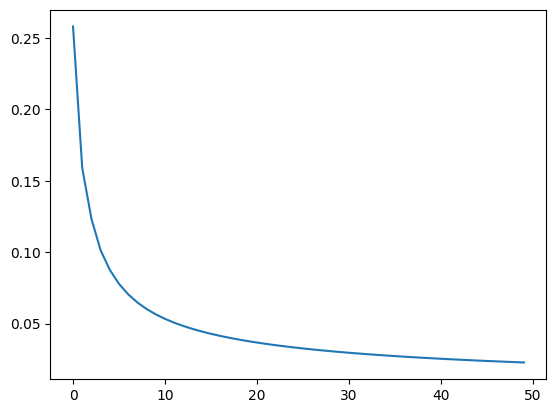

In [3]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import seaborn as sns
from src.linear import Linear
from src.losses import *
from src.non_linear import TanH, Sigmoide, Softmax
from src.encapsulation import Sequential, Optim
np.random.seed(42)


batch_size = 8

X, y = load_digits(return_X_y=True, n_class=2)
y_oh = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()

net = Sequential(
    Linear(64, 32),
    TanH(),
    Linear(32, 16),
    TanH(),
    Linear(16, 8),
    TanH(),
    Linear(8, 2),
    Sigmoide(),
    # Softmax(),
)

optimizer = Optim(net, CrossEntropyLoss(), eps=1e-2)
lossList = optimizer.SGD(X, y_oh, batch_size, 50)
print(lossList)
pd.Series(lossList).plot()
print(optimizer.score(X, y))


In [4]:
loss_df = optimizer.SGD_eval(X, y_oh, batch_size, 50, test_size=0.3, return_dataframe=True)
# sns.lineplot(loss_df, x='epoch', y='loss')

 48%|████▊     | 24/50 [00:00<00:00, 116.60it/s]

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 

 72%|███████▏  | 36/50 [00:00<00:00, 115.26it/s]

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 

100%|██████████| 50/50 [00:00<00:00, 102.14it/s]

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 

In [5]:
loss_df

,epoch,loss_test,loss_train,score_train,score_test
0,0,0.021393,0.021285,0.0,0.0
1,1,0.021231,0.021127,0.0,0.0
2,2,0.021073,0.020972,0.0,0.0
3,3,0.020919,0.020820,0.0,0.0
4,4,0.020767,0.020672,0.0,0.0
5,5,0.020619,0.020526,0.0,0.0
6,6,0.020474,0.020383,0.0,0.0
7,7,0.020332,0.020243,0.0,0.0
8,8,0.020193,0.020106,0.0,0.0
9,9,0.020057,0.019971,0.0,0.0
